# Summary

This notebook will explore the LMP data from the NYISO website.

In [88]:
import datetime

import gridstatus
import gridstatus.nyiso
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import trim_mean

pd.set_option("display.float_format", "{:.5f}".format)

nyiso = gridstatus.NYISO()

# Download the NYISO LMP data for the past year

In [15]:
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2025, 1, 1) - datetime.timedelta(days=1)

df = nyiso.get_lmp(
    date=start_date,
    end=end_date,
    market=gridstatus.Markets.DAY_AHEAD_HOURLY,
    locations="ALL",
    location_type=gridstatus.nyiso.GENERATOR,
    verbose=False,
)

100%|██████████| 12/12 [04:20<00:00, 21.73s/it]


# Overview Statistics

In [55]:
df.Congestion.describe()

count   6508231.00000
mean          2.19728
std          11.59094
min        -241.09000
25%          -0.00000
50%           0.00000
75%           0.01000
max         772.11000
Name: Congestion, dtype: float64

In [118]:
def trim_by_index(series, lower_pct=0.1, upper_pct=0.1):
    """
    Remove the lowest and highest fractions of values from a pandas Series
    based on sorted index.
    series      : a pandas Series
    lower_pct   : fraction to trim from the bottom (default 0.1)
    upper_pct   : fraction to trim from the top    (default 0.1)
    """
    vals = series.dropna().sort_values()
    n = len(vals)
    lo = int(n * lower_pct)
    hi = int(n * (1 - upper_pct))
    return vals.iloc[lo:hi]

trimmed_vals = trim_by_index(df.Congestion, lower_pct=0.1, upper_pct=0.1)

In [121]:
trimmed_vals.mean(), trimmed_vals.std()

(np.float64(0.19065503216696397), np.float64(0.6325770489204283))

# How does congestion change over the course of a day?

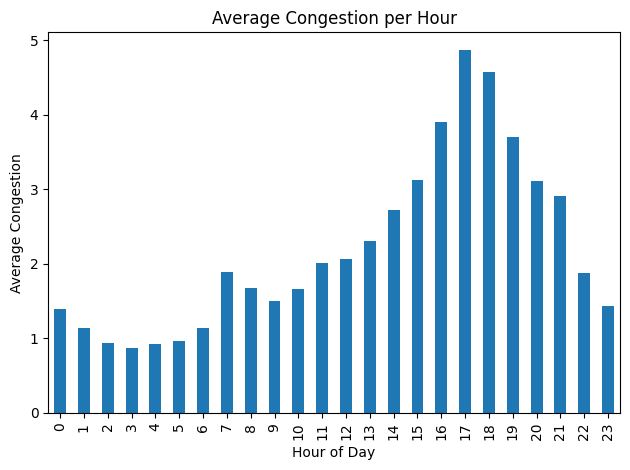

In [45]:
avg_congestion_per_hour = df.groupby(df["Interval Start"].dt.hour)["Congestion"].mean()
avg_congestion_per_hour.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Average Congestion")
plt.title("Average Congestion per Hour")
plt.tight_layout()
plt.show()

# Seasons?

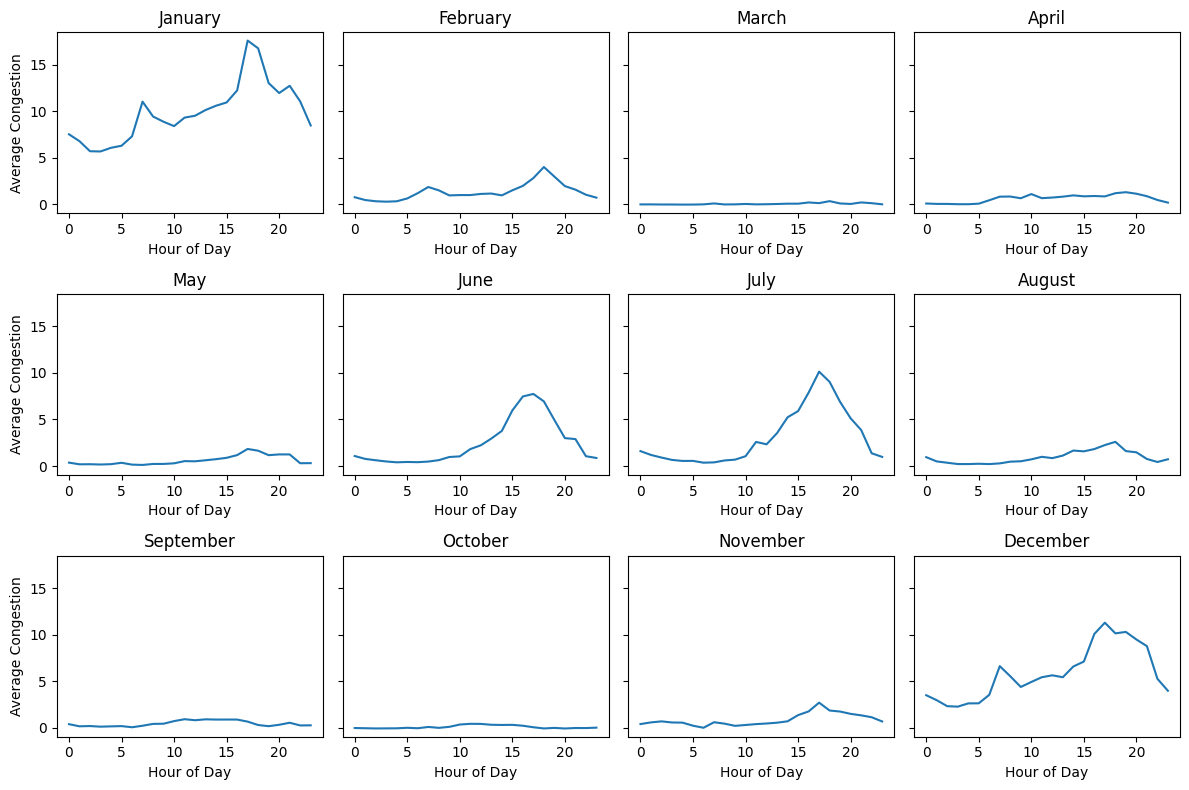

In [ ]:
import calendar

fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
axes = axes.flatten()

avg_cong_month_hour = df.pivot_table(
    index=df["Interval Start"].dt.hour,
    columns=df["Interval Start"].dt.month,
    values="Congestion",
    aggfunc="mean",
)

for month, ax in zip(avg_cong_month_hour.columns, axes):
    avg_cong_month_hour[month].plot(ax=ax)
    ax.set_title(calendar.month_name[month])
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Average Congestion")

plt.tight_layout()
plt.show()